https://www.thevisualroom.com/burgers_equation.html

https://docs.sympy.org/latest/modules/solvers/pde.html

In [1]:
from math import pi as PI
from math import exp as exp
import numpy as np
from scipy.io import savemat, loadmat
import pandas as pd

def analytical_solution(NT, NX, TMAX, XMAX, NU):
   """
   Returns the velocity field and distance for the analytical solution
   """

   # Increments
   DT = TMAX/(NT-1)
   DX = XMAX/(NX-1)

   # Initialise data structures
   u_analytical = np.zeros((NX,NT))
   x = np.zeros(NX)
   t = np.zeros(NT)

   # Distance
   for i in range(0,NX):
       x[i] = i*DX

   # Analytical Solution
   for n in range(0,NT):
       t = n*DT

       for i in range(0,NX):
           phi = exp( -(x[i]-4*t)**2/(4*NU*(t+1)) ) + exp( -(x[i]-4*t-2*PI)**2/(4*NU*(t+1)) )

           dphi = ( -0.5*(x[i]-4*t)/(NU*(t+1))*exp( -(x[i]-4*t)**2/(4*NU*(t+1)) )
               -0.5*(x[i]-4*t-2*PI)/(NU*(t+1))*exp( -(x[i]-4*t-2*PI)**2/(4*NU*(t+1)) ) )

           u_analytical[i,n] = -2*NU*(dphi/phi) + 4

   return u_analytical, x

def convection_diffusion(NT, NX, TMAX, XMAX, NU):
    """
    Returns the velocity field and distance for 1D non-linear convection-diffusion
    """

    # Increments
    DT = TMAX/(NT-1)
    DX = XMAX/(NX-1)

    # Initialise data structures
    u = np.zeros((NX,NT))
    u_analytical = np.zeros((NX,NT))
    x = np.zeros(NX)
    t = np.zeros(NT)
    ipos = np.zeros(NX, dtype=int)  # Change to integer type
    ineg = np.zeros(NX, dtype=int)  # Change to integer type

    # Periodic boundary conditions
    for i in range(0,NX):
        x[i] = i*DX
        ipos[i] = i+1
        ineg[i] = i-1

    ipos[NX-1] = 0
    ineg[0] = NX-1

    # Initial conditions
    for i in range(0,NX):
        phi = exp( -(x[i]**2)/(4*NU) ) + exp( -(x[i]-2*PI)**2 / (4*NU) )
        dphi = -(0.5*x[i]/NU)*exp( -(x[i]**2) / (4*NU) ) - (0.5*(x[i]-2*PI) / NU )*exp(-(x[i]-2*PI)**2 / (4*NU) )
        u[i,0] = -2*NU*(dphi/phi) + 4

    # Numerical solution
    for n in range(0,NT-1):
        for i in range(0,NX):
            u[i,n+1] = (u[i,n]-u[i,n]*(DT/DX)*(u[i,n]-u[ineg[i],n])+
                       NU*(DT/DX**2)*(u[ipos[i],n]-2*u[i,n]+u[ineg[i],n]))

    return u, x

def plot_diffusion(u_analytical,u,x,NT,TITLE):
   """
   Plots the 1D velocity field
   """

   import matplotlib.pyplot as plt
   import matplotlib.cm as cm
   plt.figure()
   ax=plt.subplot(111)
   colour=iter(cm.rainbow(np.linspace(0,20,NT)))
   for n in range(0,NT,20):
      c=next(colour)
      ax.plot(x,u[:,n],'ko', markerfacecolor='none', alpha=0.5, label='i='+str(n)+' numerical')
      ax.plot(x,u_analytical[:,n],linestyle='-',c=c,label='i='+str(n)+' analytical')
   box=ax.get_position()
   ax.set_position([box.x0, box.y0, box.width*0.7,box.height])
   ax.legend( bbox_to_anchor=(1.02,1), loc=2)
   plt.xlabel('x (radians)')
   plt.ylabel('u (m/s)')
   plt.ylim([0,8.0])
   plt.xlim([0,2.0*PI])
   plt.title(TITLE)
   plt.show()

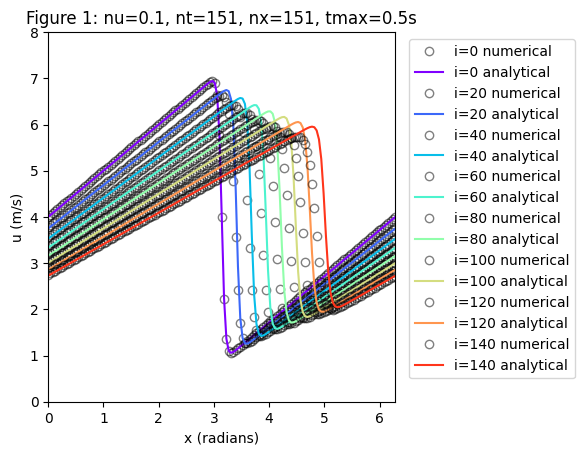

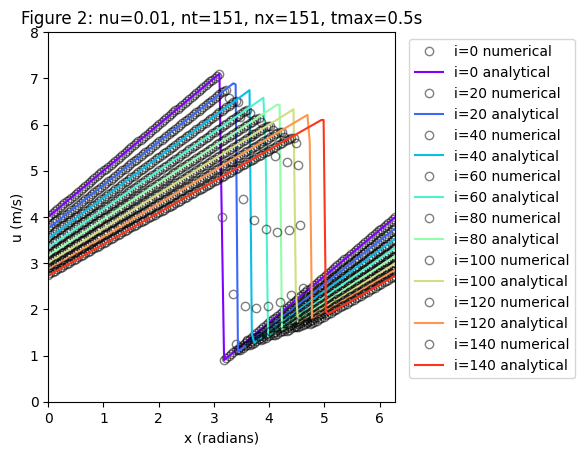

In [2]:
u,x = convection_diffusion(151, 151, 0.5, 2.0*PI, 0.1)
u_analytical,x = analytical_solution(151, 151, 0.5, 2.0*PI, 0.1)
plot_diffusion(u_analytical,u,x,151,'Figure 1: nu=0.1, nt=151, nx=151, tmax=0.5s')

u,x = convection_diffusion(151, 151, 0.5, 2.0*PI, 0.01)
u_analytical,x = analytical_solution(151, 151, 0.5, 2.0*PI, 0.01)
plot_diffusion(u_analytical,u,x,151,'Figure 2: nu=0.01, nt=151, nx=151, tmax=0.5s')

In [3]:
np.savez("Burgers_data.npz", u=u, u_analytical=u_analytical, x=x)

In [4]:
burgers = np.load('Burgers_data.npz')
burgers.files

['u', 'u_analytical', 'x']

In [5]:
for array_name in burgers.files:
    print(f"\nArray '{array_name}':")
    print(burgers[array_name])


Array 'u':
[[4.         4.00079577 3.99628525 ... 2.70419204 2.69816132 2.69215746]
 [4.0418879  4.02841494 4.01982946 ... 2.7322168  2.72612358 2.7200575 ]
 [4.0837758  4.07016322 4.05664123 ... 2.76024156 2.75408584 2.74795754]
 ...
 [3.9162242  3.90317012 3.89020292 ... 2.62011777 2.61427454 2.60845735]
 [3.9581121  3.94491839 3.93179738 ... 2.64814253 2.6422368  2.63635738]
 [4.         3.98587089 3.97238689 ... 2.67616728 2.67019906 2.66425742]]

Array 'u_analytical':
[[4.         3.98671096 3.97350993 ... 2.67857143 2.67260579 2.66666667]
 [4.0418879  4.0284597  4.01512043 ... 2.70662136 2.70059325 2.69459193]
 [4.0837758  4.07020844 4.05673093 ... 2.7346713  2.72858072 2.7225172 ]
 ...
 [3.9162242  3.90321348 3.89028894 ... 2.62247156 2.61663087 2.61081613]
 [3.9581121  3.94496222 3.93189944 ... 2.65052149 2.64461833 2.6387414 ]
 [4.         3.98671096 3.97350993 ... 2.67857143 2.67260579 2.66666667]]

Array 'x':
[0.         0.0418879  0.0837758  0.12566371 0.16755161 0.2094395

In [6]:
data = {
    "u": u,
    "x": x
}

# Save as .mat file
savemat("Burgers_data.mat", data)

In [7]:
mat = loadmat('/home/rusted/Projects/Thesis/neuraloperator/Burgers_data.mat')

In [8]:
burgers_x = pd.DataFrame(mat.get('x'))
burgers_u = pd.DataFrame(mat.get('u'))

In [9]:
burgers_x

,0,1,2,3,4,5,6,7,8,9,...,141,142,143,144,145,146,147,148,149,150
0,0.0,0.041888,0.083776,0.125664,0.167552,0.20944,0.251327,0.293215,0.335103,0.376991,...,5.906194,5.948082,5.98997,6.031858,6.073746,6.115634,6.157522,6.19941,6.241297,6.283185


In [10]:
burgers_u

,0,1,2,3,4,5,6,7,8,9,...,141,142,143,144,145,146,147,148,149,150
0,4.000000,4.000796,3.996285,3.988679,3.979228,3.968659,3.957401,3.945715,3.933764,3.921655,...,2.747175,2.740951,2.734755,2.728587,2.722447,2.716335,2.710250,2.704192,2.698161,2.692157
1,4.041888,4.028415,4.019829,4.012550,4.005088,3.996915,3.987930,3.978201,3.967852,3.957015,...,2.775645,2.769357,2.763097,2.756865,2.750661,2.744485,2.738337,2.732217,2.726124,2.720057
2,4.083776,4.070163,4.056641,4.044849,4.034596,4.025267,4.016303,4.007312,3.998066,3.988457,...,2.804115,2.797762,2.791438,2.785142,2.778875,2.772636,2.766425,2.760242,2.754086,2.747958
3,4.125664,4.111911,4.098251,4.084681,4.071765,4.059790,4.048729,4.038381,4.028486,4.018805,...,2.832585,2.826168,2.819780,2.813420,2.807089,2.800787,2.794512,2.788266,2.782048,2.775858
4,4.167552,4.153660,4.139860,4.126153,4.112535,4.099203,4.086377,4.074185,4.062643,4.051673,...,2.861056,2.854574,2.848121,2.841698,2.835303,2.828937,2.822600,2.816291,2.810010,2.803758
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,3.832448,3.819674,3.806984,3.794378,3.781856,3.769416,3.757058,3.744781,3.732584,3.720466,...,2.604824,2.598922,2.593048,2.587199,2.581378,2.575582,2.569812,2.564068,2.558350,2.552657
147,3.874336,3.861422,3.848593,3.835850,3.823191,3.810615,3.798122,3.785710,3.773380,3.761130,...,2.633294,2.627328,2.621389,2.615477,2.609591,2.603732,2.597900,2.592093,2.586312,2.580557
148,3.916224,3.903170,3.890203,3.877321,3.864525,3.851813,3.839184,3.826638,3.814175,3.801792,...,2.661764,2.655734,2.649731,2.643755,2.637805,2.631883,2.625987,2.620118,2.614275,2.608457
149,3.958112,3.944918,3.931797,3.918764,3.905822,3.892970,3.880207,3.867529,3.854936,3.842425,...,2.690234,2.684139,2.678072,2.672032,2.666019,2.660034,2.654075,2.648143,2.642237,2.636357
